In [1]:
#LSTM
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from torch.utils.data import Dataset,DataLoader,TensorDataset

E:\Anaconda\envs\TF2.1\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
E:\Anaconda\envs\TF2.1\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
E:\Anaconda\envs\TF2.1\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


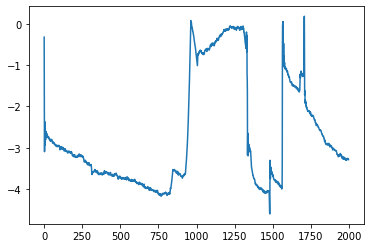

Epoch:0,loss:0.1307239830493927 
Epoch:0,loss:0.08270391076803207 
Epoch:0,loss:0.05012299865484238 
Epoch:0,loss:0.026292048394680023 
Epoch:0,loss:0.010628420859575272 
Epoch:0,loss:0.0023398075718432665 
Epoch:0,loss:5.2384733862709254e-05 
Epoch:0,loss:0.004136068280786276 
Epoch:0,loss:0.014271765016019344 
Epoch:0,loss:0.019785024225711823 
Epoch:0,loss:0.02099308744072914 
Epoch:0,loss:0.01645888015627861 
Epoch:0,loss:0.014873475767672062 
Epoch:0,loss:0.011667609214782715 
Epoch:0,loss:0.010048970580101013 
Epoch:0,loss:0.007215133868157864 
Epoch:0,loss:0.0057842968963086605 
Epoch:0,loss:0.004413008224219084 
Epoch:0,loss:0.003653891384601593 
Epoch:0,loss:0.0038085090927779675 
Epoch:0,loss:0.0032427487894892693 
Epoch:0,loss:0.0029321247711777687 
Epoch:0,loss:0.0033257403410971165 
Epoch:0,loss:0.0017489813035354018 
Epoch:0,loss:0.000714763649739325 
Epoch:0,loss:0.007451125420629978 
Epoch:0,loss:0.00628189742565155 
Epoch:0,loss:0.009098636917769909 
Epoch:0,loss:0.309

Epoch:4,loss:0.0001545556733617559 
Epoch:4,loss:5.9321027947589755e-05 
Epoch:4,loss:0.00022028280363883823 
Epoch:4,loss:0.0004891739226877689 
Epoch:4,loss:0.0021588867530226707 
Epoch:4,loss:2.9551989428000525e-05 
Epoch:4,loss:0.0325995609164238 
Epoch:4,loss:0.008122365921735764 
Epoch:5,loss:0.0012417526450008154 
Epoch:5,loss:0.0013755806721746922 
Epoch:5,loss:0.0013222966808825731 
Epoch:5,loss:0.0011047098087146878 
Epoch:5,loss:0.000809529097750783 
Epoch:5,loss:0.0006467257626354694 
Epoch:5,loss:0.00036312040174379945 
Epoch:5,loss:0.00013302694424055517 
Epoch:5,loss:6.760115502402186e-05 
Epoch:5,loss:5.339553899830207e-05 
Epoch:5,loss:0.00011947257007705048 
Epoch:5,loss:0.00013664265861734748 
Epoch:5,loss:0.00028627627762034535 
Epoch:5,loss:0.0003831125795841217 
Epoch:5,loss:0.0005179352592676878 
Epoch:5,loss:0.0005676985019817948 
Epoch:5,loss:0.0007196934893727303 
Epoch:5,loss:0.0008091873023658991 
Epoch:5,loss:0.0009212176082655787 
Epoch:5,loss:0.0012145215

Epoch:9,loss:7.522755186073482e-05 
Epoch:9,loss:1.7712001863401383e-05 
Epoch:9,loss:6.380673585226759e-05 
Epoch:9,loss:0.00013059625052846968 
Epoch:9,loss:9.930747910402715e-05 
Epoch:9,loss:5.782348307548091e-05 
Epoch:9,loss:0.00013594963820651174 
Epoch:9,loss:0.01064013596624136 
Epoch:9,loss:6.058863436919637e-05 
Epoch:9,loss:8.76052217790857e-06 
Epoch:9,loss:2.9132996132830158e-05 
Epoch:9,loss:0.0001595205976627767 
Epoch:9,loss:0.0021332900505512953 
Epoch:9,loss:4.480351708480157e-05 
Epoch:9,loss:0.026334306225180626 
Epoch:9,loss:0.00027435983065515757 


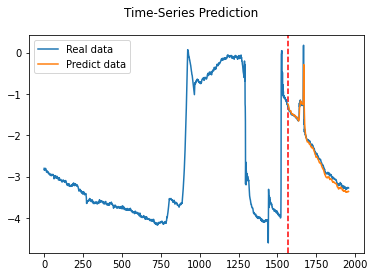

0.025407525


In [4]:
def sliding_windows(data,seq_length):
    #数据分割成多段子序列，子序列长度seq_length
    x = []
    y = []
    
    for i in range(len(data) - seq_length - 1):
        _x = data[i:(i + seq_length)]
        _y = data[i + seq_length]
        x.append(_x)
        y.append(_y)
        
    return np.array(x),np.array(y)

class LSTM(nn.Module):
    
    def __init__(self,num_classes,input_size,hidden_size,num_layers):
        super(LSTM,self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size = input_size,hidden_size = hidden_size,
                           num_layers = num_layers,batch_first = True)
        self.fc = nn.Linear(hidden_size,num_classes)
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers,x.size(0),self.hidden_size))
        c_0 = Variable(torch.zeros(self.num_layers,x.size(0),self.hidden_size))
        ula , (h_out,_) = self.lstm(x,(h_0,c_0))
        h_out = h_out.view(-1,self.hidden_size)
        out = self.fc(h_out)
        
        return out
    
if __name__ == '__main__':
    path = r'28min_data.csv'
    training_set = pd.read_csv(path)
    training_set = training_set.iloc[:,0:1].values
    plt.figure()
    plt.plot(training_set,label = 'Shampoo Sales Data')
    plt.show()
    
    #1.数据处理
    sc = MinMaxScaler()
    training_data = sc.fit_transform(training_set)
    
    seq_length = 40
    # 将数据分割成多段子序列，子序列长度为seq_length
    # x:[139,4,1]，子序列
    # y:每四个预测后面一个，后面一个作为y
    x,y = sliding_windows(training_data,seq_length)
    
    train_size = int(len(y) * 0.8)
    test_size = len(y) - train_size
    
    dataX = Variable(torch.Tensor(np.array(x)))
    dataY = Variable(torch.Tensor(np.array(y)))
    
    trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
    trainY = Variable(torch.Tensor(np.array(y[0:train_size])))
    
    testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
    testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))
    
    #训练模型参数设置
    num_epoch = 200
    learning_rate = 0.01
    
    input_size = 1
    hidden_size = 10
    num_classes = 1
    num_layers = 1
    
    lstm = LSTM(num_classes,input_size,hidden_size,num_layers)
    
    criterion = torch.nn.MSELoss() #  mean-squared error for regression
    optimizer = torch.optim.Adam(lstm.parameters(),lr = learning_rate)
    
    #训练神经网络
    EPOCH = 10
    bathsize = 32
    train_dataset = TensorDataset(trainX, trainY)
    trainloader = DataLoader(train_dataset,batch_size=bathsize,shuffle=False)
    for epoch in range(EPOCH):
        for i,(tx,ty) in enumerate(trainloader):
            output = lstm(tx)
            loss = criterion(output,ty)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            print(f'Epoch:{epoch},loss:{loss.item()} ')
    
    
    #测试
    lstm.eval()
    train_predict = lstm(dataX)
    
    data_predict = train_predict.data.numpy()
    dataY_plot = dataY.data.numpy()
    
    data_predict = sc.inverse_transform(data_predict)
    dataY_plot = sc.inverse_transform(dataY_plot)
    
    aixs = np.array(range(1958))
    plt.figure()
    plt.axvline(x=train_size,c='r',linestyle='--')
    plt.plot(dataY_plot,label = 'Real data')
    plt.plot(aixs[train_size:],data_predict[train_size:],label='Predict data')
    plt.suptitle('Time-Series Prediction')
    plt.legend()
    plt.show()
    
    MSE = mean_squared_error(dataY_plot[test_size:len(x)],data_predict[test_size:len(x)])
    print(MSE)
#准

Iteration:0,loss:0.45278215408325195
Iteration:100,loss:0.013599323108792305
Iteration:200,loss:0.005983722861856222
Iteration:300,loss:0.006273534148931503
Iteration:400,loss:0.0012330496683716774
Iteration:500,loss:0.0018913884414359927
Iteration:600,loss:0.0012976916041225195
Iteration:700,loss:0.002078944118693471
Iteration:800,loss:0.0006620956119149923
Iteration:900,loss:0.0005433837068267167
Iteration:1000,loss:0.0007453208090737462
Iteration:1100,loss:0.001034292159602046
Iteration:1200,loss:0.0006397113320417702
Iteration:1300,loss:0.0006074352422729135
Iteration:1400,loss:0.0011146541219204664
Iteration:1500,loss:0.0014124399749562144
Iteration:1600,loss:0.0004045951063744724
Iteration:1700,loss:0.00025891236145980656
Iteration:1800,loss:0.0013291509822010994
Iteration:1900,loss:0.00024793477496132255
Iteration:2000,loss:0.0003230618021916598
Iteration:2100,loss:0.0018403235590085387
Iteration:2200,loss:0.00011089909094152972
Iteration:2300,loss:0.00019604334374889731
Iterati

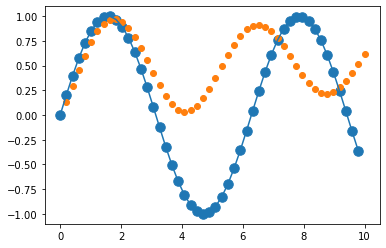

In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from matplotlib import pyplot as plt
num_time_steps = 50
input_size = 1
hidden_size = 16
output_size = 1
lr = 0.01

class Net(nn.Module):
    
    def __init__(self,):
        super(Net,self).__init__()
        
        self.rnn  = nn.RNN(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers = 1,
            batch_first = True,
        )
        for p in self.rnn.parameters():
            nn.init.normal_(p,mean=0.0,std=0.001)
            
        self.linear  = nn.Linear(hidden_size,output_size)
        
    def forward(self,x,hidden_prev):
        
        out,hidden_prev = self.rnn(x,hidden_prev)
        
        out =  out.view(-1,hidden_size)
        out = self.linear(out)
        out = out.unsqueeze(dim = 0)
        return out,hidden_prev

model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr)

hidden_prev = torch.zeros(1,1,hidden_size)

for iter in range(6000):
    start = np.random.randint(3,size=1)[0]
    time_steps = np.linspace(start,start + 10,num_time_steps)
    data = np.sin(time_steps)
    data = data.reshape(num_time_steps,1)
    x = torch.tensor(data[:-1]).float().view(1,num_time_steps - 1,1)
    y = torch.tensor(data[1:]).float().view(1,num_time_steps - 1,1)
    
    output,hidden_prev = model(x,hidden_prev)
    hidden_prev = hidden_prev.detach()
    
    loss = criterion(output,y)
    model.zero_grad()
    loss.backward()
    
    optimizer.step()
    
    if iter % 100 == 0:
        print(f'Iteration:{iter},loss:{loss.item()}')
        
start = np.random.randint(3,size=1)[0]
time_steps = np.linspace(start,start + 10, num_time_steps)
data = np.sin(time_steps)
data = data.reshape(num_time_steps,1)
x = torch.tensor(data[:-1]).float().view(1,num_time_steps - 1,1)
y = torch.tensor(data[1:]).float().view(1,num_time_steps - 1,1)

predictions = []
input = x[:,0,:]
for _ in range(x.shape[1]):
    input = input.view(1,1,1)
    (pred,hidden_prev) = model(input,hidden_prev)
    input = pred
    predictions.append(pred.detach().numpy().ravel()[0])
    
x = x.data.numpy().ravel()
y = y.data.numpy()
plt.scatter(time_steps[:-1],x.ravel(),s=90)
plt.plot(time_steps[:-1],x.ravel())

plt.scatter(time_steps[1:],predictions)
plt.show()